# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Imports

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
from scipy.stats import mode
import tensorflow as tf
from tqdm import tqdm
from tensorflow.contrib.layers import flatten
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import control_flow_ops

---
## Step 0: Load The Data

In [10]:
training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p" 
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [11]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Number of validation examples.
n_valid = X_valid.shape[0]

# Read the CSV to map class values to names.
names = pd.read_csv('signnames.csv')

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
# With Numpy
n_classes = np.max(y_train) + 1
# With Pandas
n_classes = names.shape[0]

mean = np.mean(X_train)
stddev = np.std(X_train)

print("Number of training examples =", n_train)
print("Number of validation example = ", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Mean of Training data =", mean)
print("Standard Deviation of Training data =", stddev)

Number of training examples = 34799
Number of validation example =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Mean of Training data = 82.677589037
Standard Deviation of Training data = 67.8508884263


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

The mean of the training data is: 82.677589037
The standard deviation of the training data is: 67.8508884263
Class 0: Speed limit (20km/h)                               180 samples


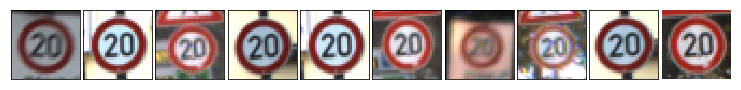

Class 1: Speed limit (30km/h)                               1980 samples


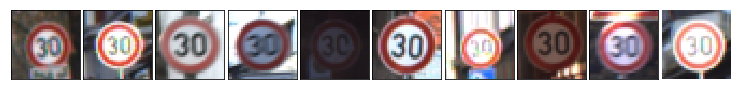

Class 2: Speed limit (50km/h)                               2010 samples


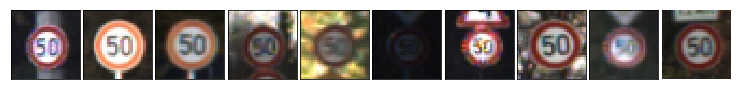

Class 3: Speed limit (60km/h)                               1260 samples


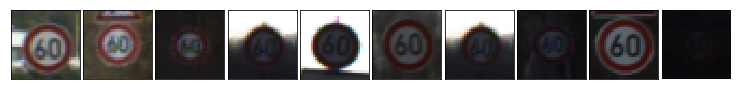

Class 4: Speed limit (70km/h)                               1770 samples


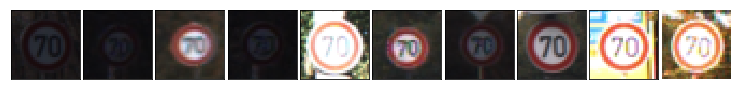

Class 5: Speed limit (80km/h)                               1650 samples


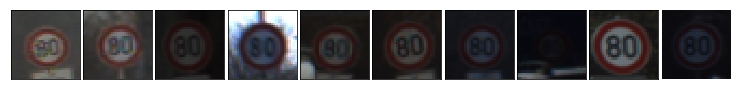

Class 6: End of speed limit (80km/h)                        360 samples


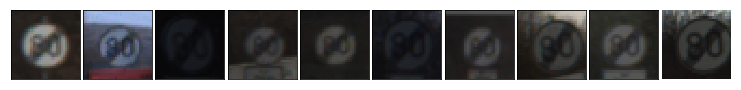

Class 7: Speed limit (100km/h)                              1290 samples


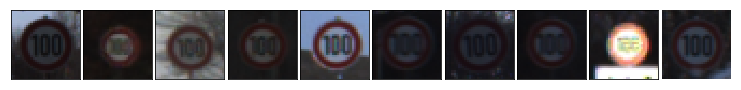

Class 8: Speed limit (120km/h)                              1260 samples


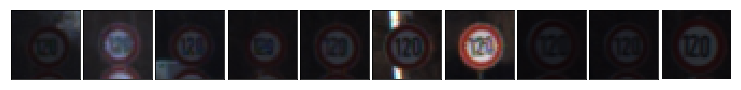

Class 9: No passing                                         1320 samples


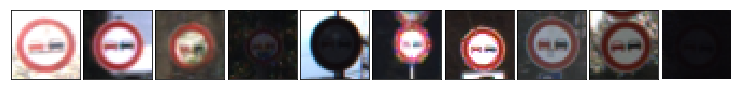

Class 10: No passing for vehicles over 3.5 metric tons       1800 samples


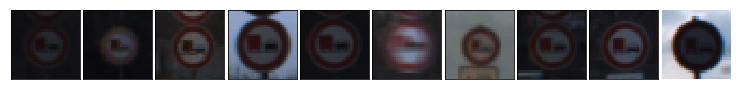

Class 11: Right-of-way at the next intersection              1170 samples


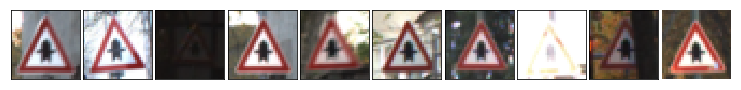

Class 12: Priority road                                      1890 samples


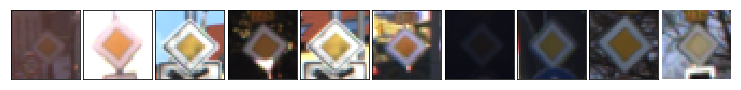

Class 13: Yield                                              1920 samples


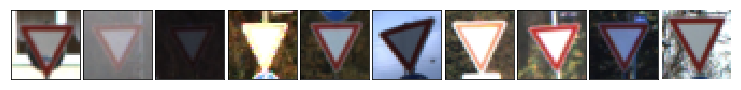

Class 14: Stop                                               690 samples


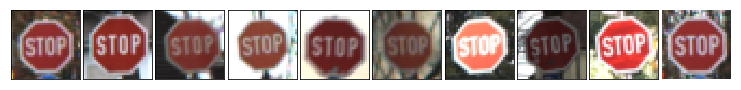

Class 15: No vehicles                                        540 samples


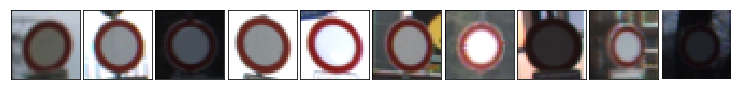

Class 16: Vehicles over 3.5 metric tons prohibited           360 samples


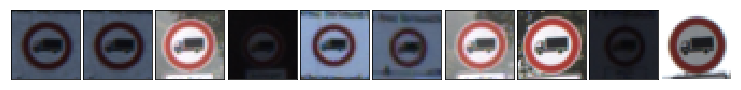

Class 17: No entry                                           990 samples


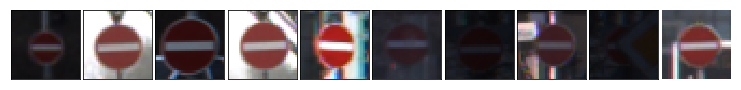

Class 18: General caution                                    1080 samples


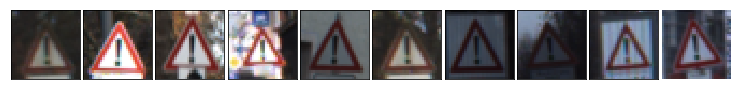

Class 19: Dangerous curve to the left                        180 samples


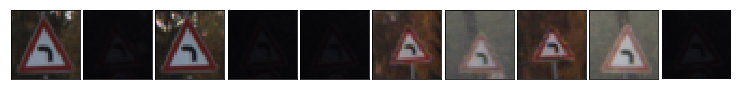

Class 20: Dangerous curve to the right                       300 samples


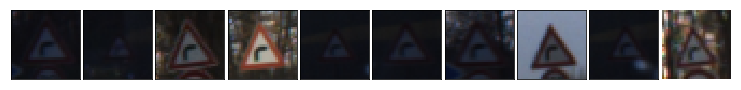

Class 21: Double curve                                       270 samples


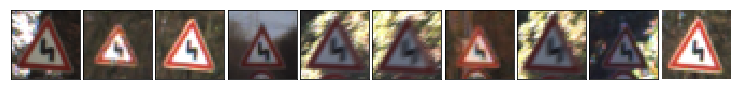

Class 22: Bumpy road                                         330 samples


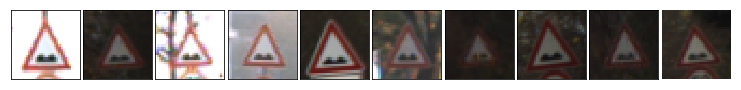

Class 23: Slippery road                                      450 samples


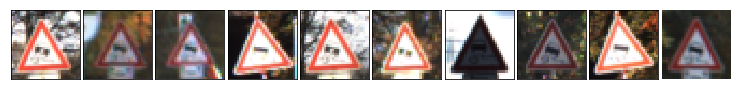

Class 24: Road narrows on the right                          240 samples


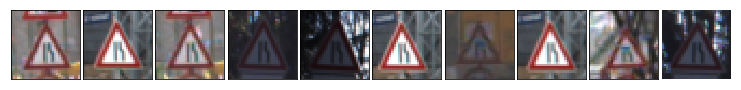

Class 25: Road work                                          1350 samples


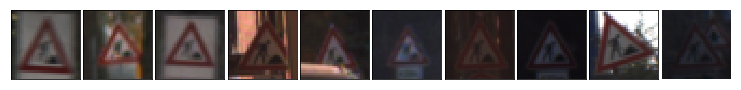

Class 26: Traffic signals                                    540 samples


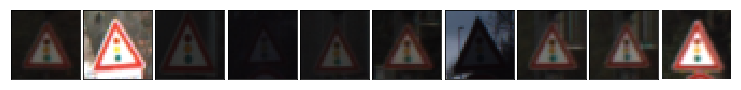

Class 27: Pedestrians                                        210 samples


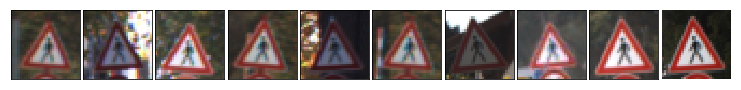

Class 28: Children crossing                                  480 samples


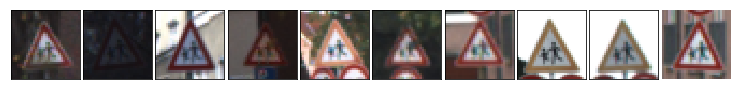

Class 29: Bicycles crossing                                  240 samples


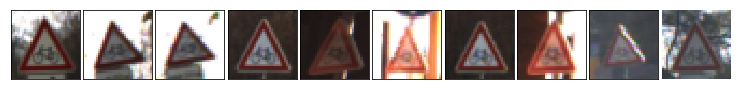

Class 30: Beware of ice/snow                                 390 samples


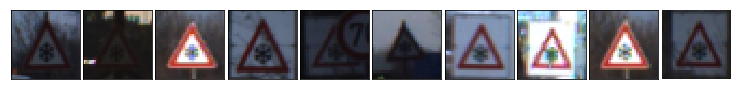

Class 31: Wild animals crossing                              690 samples


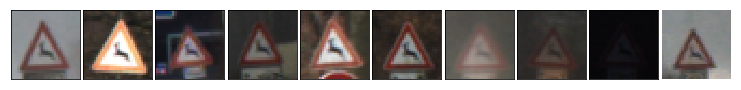

Class 32: End of all speed and passing limits                210 samples


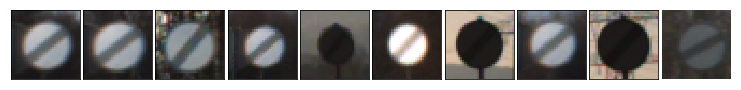

Class 33: Turn right ahead                                   599 samples


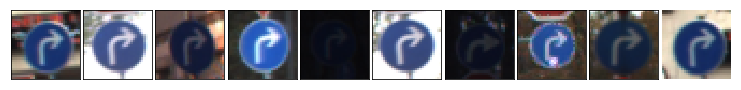

Class 34: Turn left ahead                                    360 samples


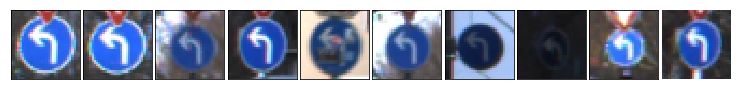

Class 35: Ahead only                                         1080 samples


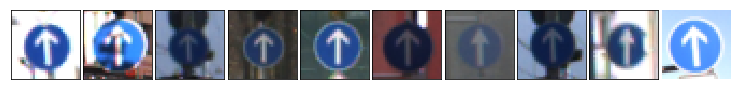

Class 36: Go straight or right                               330 samples


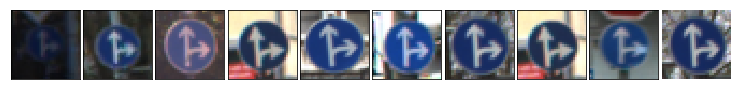

Class 37: Go straight or left                                180 samples


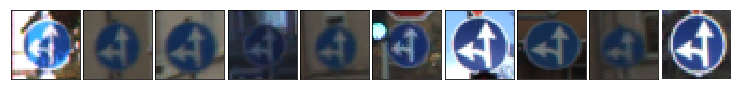

Class 38: Keep right                                         1860 samples


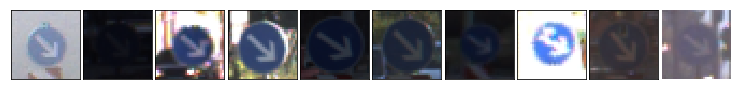

Class 39: Keep left                                          270 samples


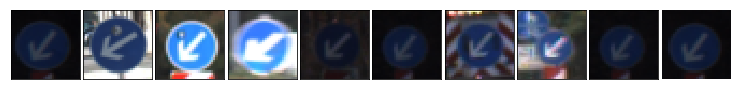

Class 40: Roundabout mandatory                               300 samples


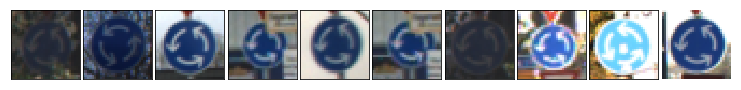

Class 41: End of no passing                                  210 samples


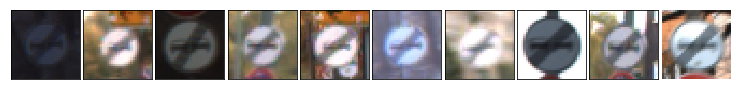

Class 42: End of no passing by vehicles over 3.5 metric tons 210 samples


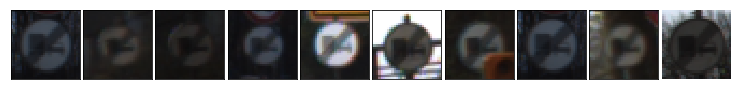

In [15]:
# Visualizations will be shown in the notebook.
%matplotlib inline
# Mean, stddev
mean = np.mean(X_train)
stddev = np.std(X_train)
print("The mean of the training data is:", mean)
print("The standard deviation of the training data is:", stddev)

import random

signnames = []
for i in range(n_classes):
    signnames.append(names['SignName'][i])
    
def examples_from_each(X_data, y_data, n_classes, class_names, cmap=None):
    col_width = max(len(name) for name in class_names)
    for i in range(n_classes):
        # Get all the training data in this class
        idx = np.where(y_data==i) 
        x_class = X_data[idx]
        class_count = x_class.shape[0]
        print("Class %i: %-*s %s samples" % (i, col_width, class_names[i], str(class_count)))
        # Show an example from that class
        fig = plt.figure(figsize = (10 ,1))
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
        random_indices = np.random.choice(x_class.shape[0], 10)
        for j in range(10):
            axis = fig.add_subplot(1, 10, j + 1, xticks=[], yticks=[])
            if cmap is None:
                plt.imshow(x_class[random_indices[j], :, :, :])
            else:
                plt.imshow(x_class[random_indices[j], :, :, :].squeeze(), cmap=cmap)
        plt.axis('off')
        plt.show()
        
examples_from_each(X_train, y_train, n_classes, signnames)

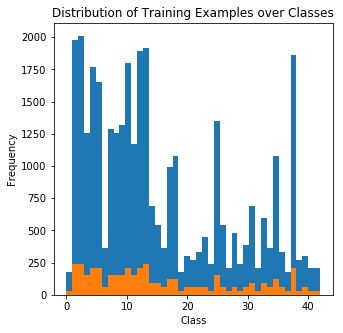

In [5]:
def draw_histogram(labels, n_classes):
    fig_size = [5, 5]
    plt.rcParams["figure.figsize"] = fig_size
    _ = plt.hist(labels, bins=n_classes)
    _ = plt.title('Distribution of Training Examples over Classes')
    _ = plt.xlabel('Class')
    _ = plt.ylabel('Frequency')

draw_histogram(y_train, n_classes)
draw_histogram(y_valid, n_classes)
plt.show()

This is quite an unbalanced dataset so it can get rather high accuracy by just learning the most common signs and performing poorly on the others. Using data augmentation I will create more examples for the under represented classes to fix this.

The Provided Validation set is more balanced that the dataset which is good but still unbalanced

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

### Augmenting the dataset

In order for deep learning to work better I will be augmenting the data set. First I will flip and rotate the signes that can be fliped or rotated to create a larger dataset. Then I will use jitter to create articifcal examples for classes that are under represented.

In [6]:
def extend_dataset(X_data, y_data, num_classes):
    """
    Right-of-way at the next intersection
    Priority road
    Yield
    No vehicles
    No entry
    General caution
    Bumpy road
    Traffic signals
    Beware of ice/snow
    Ahead only
    """
    horizontal_flippable = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    """
    Speed limit (30km/h)
    Speed limit (80km/h)
    Priority road
    No vehicles
    No entry
    """
    vertical_flippable = np.array([1, 5, 12, 15, 17])
    """
    End of all speed and passing limits
    Roundabout mandatory
    """
    rotatable = np.array([32, 40])
    """
    Dangerous curve to the left <--> Dangerous curve to the right
    Turn right ahead <--> Turn left ahead
    Go straight or right <--> Go straight or left
    Keep right <--> Keep left
    """
    change_flippable = np.array([[19, 20], [33, 34], [36, 37], [38, 39], [20, 19], [34, 33], [37, 36], [39, 38]])
    
    X_extend = np.empty([0, X_data.shape[1], X_data.shape[2], X_data.shape[3]], dtype=X_data.dtype)
    y_extend = np.empty([0], dtype=y_data.dtype)
    
    # Iterate over each class label
    for c in range(num_classes):
        # Add all datapoints in X_data where the label (y_data) is equal to this class to X_extend
        X_extend = np.append(X_extend, X_data[y_data == c], axis=0)
        # If this class can be flipped horizontal and stay the same class
        if c in horizontal_flippable:
            # Copy all the datapoints in X_data where label is equal to this class into X_extend but flip it
            X_extend = np.append(X_extend, X_data[y_data == c][:, :, ::-1, :], axis=0)
        # If this class can be flipped but flipping it changes its label
        if c in change_flippable[:, 0]:
            # Get the class that the flipping chagnes this one into
            flip_class = change_flippable[change_flippable[:, 0] == c][0][1]
            # Get all the datapoints in X_data where the label is equal to the class flipping would create
            # and copy it into X_extend but flip it.
            X_extend = np.append(X_extend, X_data[y_data==flip_class][:, :, ::-1, :], axis=0)
        # Append to y_extend to it is the same length as X_extend. Fill with this class label
        y_extend = np.append(y_extend, np.full((X_extend.shape[0] - y_extend.shape[0]), c, dtype=y_data.dtype))
        # If this class can be flipped vertically and stay the same class
        if c in vertical_flippable:
            # Copy all datapoints in X_extend that can where label is this class into X_extend but flip them vertically
            X_extend = np.append(X_extend, X_extend[y_extend == c][:, ::-1, :, :], axis=0)
        # Fill y_extend with labels
        y_extend = np.append(y_extend, np.full((X_extend.shape[0] - y_extend.shape[0]), c, dtype=y_data.dtype))
        # If this class can be rotated and keep the same class (rotation is the same as fliping horizontally and vertically)
        if c in rotatable:
            # copy all datapoints in X_extend that where the label is the class into X_extend but flip in both directions
            X_extend = np.append(X_extend, X_extend[y_extend == c][:, ::-1, ::-1, :], axis=0)
        # Fill y_extend with labels
        y_extend = np.append(y_extend, np.full((X_extend.shape[0] - y_extend.shape[0]), c, dtype=y_data.dtype))
    return X_extend, y_extend

X_train, y_train = extend_dataset(X_train, y_train, n_classes)

Extending the Dataset increased the number of examples from 34799 to 59788. Unfortunatly the data is even more unbalanced.

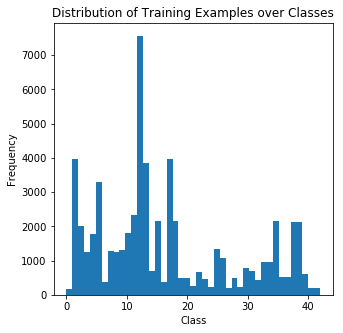

In [7]:
draw_histogram(y_train, n_classes)

### Balancing the dataset

Using jitter I will goose the images. I will apply these to classes that are under represented in order to balance the dataset.

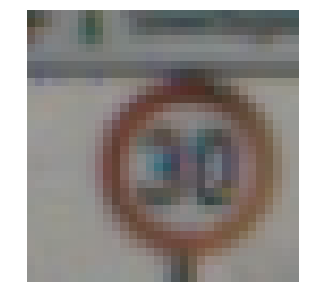

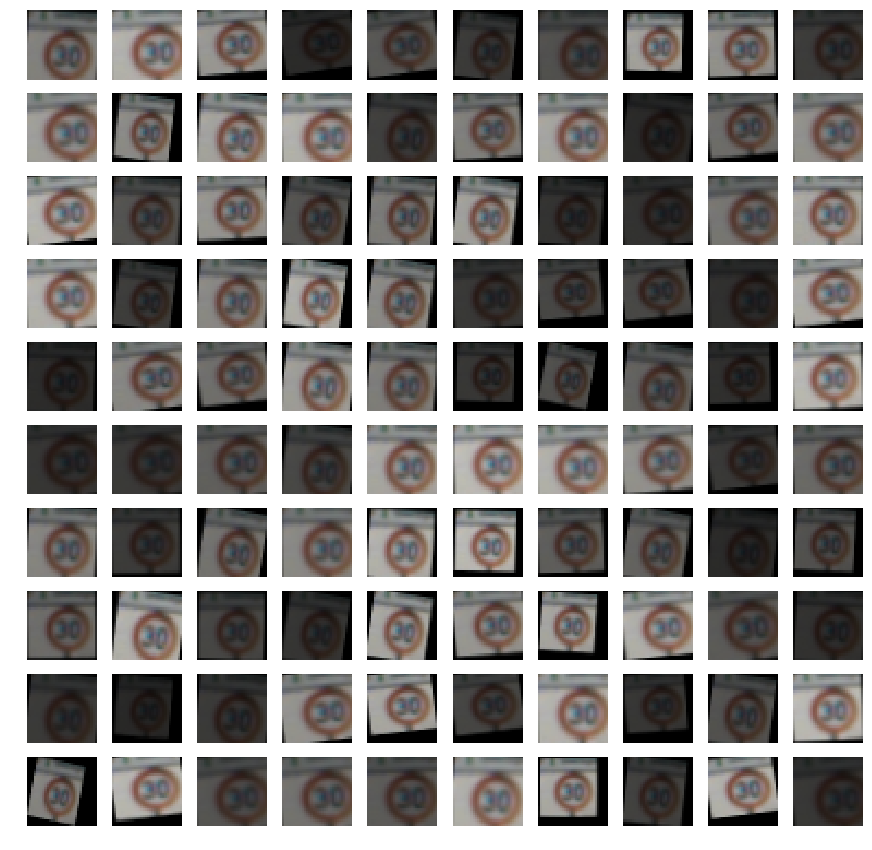

In [10]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

# Jitter Function
def jitter_image(image, angle_range, shear_range, trans_range):
    # Rotation
    angle = np.random.uniform(angle_range) - angle_range/2
    rows, cols, channels = image.shape
    rotation_M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    
    # Translation
    translation_x = trans_range * np.random.uniform() - trans_range/2
    translation_y = trans_range * np.random.uniform() - trans_range/2
    translation_M = np.float32([[1, 0, translation_x], [0, 1, translation_y]])
    
    # Shear
    points1 = np.float32([[5, 5], [20, 5], [5, 20]])
    point1 = 5 + shear_range * np.random.uniform() - shear_range/2
    point2 = 20 + shear_range * np.random.uniform() - shear_range/2
    points2 = np.float32([[point1, 5],[point2, point1], [5, point2]])
    shear_M = cv2.getAffineTransform(points1, points2)
    
    image = cv2.warpAffine(image, rotation_M, (cols, rows))
    image = cv2.warpAffine(image, translation_M, (cols, rows))
    image = cv2.warpAffine(image, shear_M, (cols, rows))
    
    #Brightness augmentation
    image = augment_brightness_camera_images(image)
    
    return image

# Jitter Examples
# Adapted from https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3#.bj0y7apy9
image = X_train[650, :, :, :]
plt.axis('off')
plt.imshow(image)
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(15,15))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = jitter_image(image,5,5,2)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [15]:
# Applying Jitter to the dataset
def balance_dataset(X_data, y_data, n_classes):
    max_class = mode(y_data)[0][0]
    max_count = X_data[y_data==max_class].shape[0]
    
    X_jitter = np.empty([0, X_data.shape[1], X_data.shape[2], X_data.shape[3]], dtype=X_data.dtype)
    y_jitter = np.empty([0], dtype=y_data.dtype)
    
    # Jitter the Max class first
    jittered_images = []
    idx = np.where(y_data == max_class)
    x_class = X_data[idx]
    for image in range(x_class.shape[0]):
        jittered_images.append(jitter_image(x_class[image, :, :, :], 5, 5, 2))
    jittered_images = np.array(jittered_images)
    X_jitter = np.append(X_jitter, np.append(X_data[y_data == max_class], jittered_images, axis=0), axis=0)
    y_jitter = np.append(y_jitter, np.full((X_jitter.shape[0] - y_jitter.shape[0]), max_class, dtype=y_data.dtype))
    max_count = X_jitter.shape[0]
    
    for i in tqdm(range(n_classes), unit="classes"):
        if i == max_class:
            continue
        jittered_images = []
        idx = np.where(y_data==i) 
        x_class = X_data[idx]
        difference = max_count - x_class.shape[0]
        
        random_indices = np.random.choice(x_class.shape[0], difference)
        
        for index in random_indices:
            jittered_images.append(jitter_image(x_class[index, :, :, :], 5, 5, 2))
        jittered_images = np.array(jittered_images)
        X_jitter = np.append(X_jitter, np.append(X_data[y_data == i], jittered_images, axis=0), axis=0)
        y_jitter = np.append(y_jitter, np.full((X_jitter.shape[0] - y_jitter.shape[0]), i, dtype=y_data.dtype))
    return X_jitter, y_jitter

X_train, y_train = balance_dataset(X_train, y_train, n_classes)
print(X_train.shape)
print(y_train.shape)

  0%|          | 0/43 [00:00<?, ?classes/s]

15120


100%|██████████| 43/43 [00:58<00:00,  1.54s/classes]

(650160, 32, 32, 3)
(650160,)


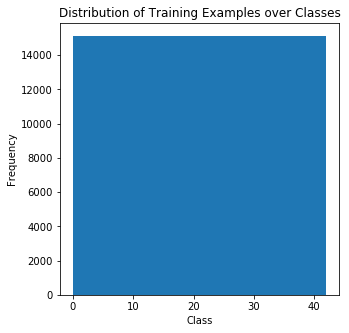

In [16]:
# Histogram to prove it
draw_histogram(y_train, n_classes)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## My Helper Functions

In [12]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Convert data to gray scale and reshape for feeding into the neural network
# r, g, and b values come form the weighted averages used in Y'UV color space 
# https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems
def gray_scale(data, r=0.299, g=0.587, b=0.114):
    data1 = np.dot(data, [r, g, b])
    #data1 = np.reshape(data1, [data.shape[0], data.shape[1], data.shape[2], 1])
    return data1

# Center the data around the origin
def mean_subtraction(data, mean=None):
    if mean is None:
        # This works for images
        mean = np.mean(data)
        # With other data the mean should be calulated per feature
        # mean = np.mean(data, axis=0)
    data = data.astype(mean.dtype) 
    data -= mean
    return data

# Normalization is normally used when the different input features have different scales but are equally 
# important to the classifier. With images each input it a pixel which already have approximately equal scales 
# (0 to 255) so this is not strictly nessissary. However, normalizing does reduce the values of the pixels so 
# smaller numbers flow through the network. This should help reduce complexity and increase numerical stability.
def normalize(data, stddev=None):
    """
    NOTE: Should be run after the data has had the mean subtracted
    """
    if stddev is None:
        # This works for images
        stddev = np.std(data)
        # With other data the stddev should be per feature
        # stddev = np.std(data, axis=0)
    data = data.astype(stddev.dtype) 
    data /= stddev
    return data

# Normalizing the dataset

Both the validation and testing sets are mean subtracted and normalized using the mean and standard deviation of the training data. The network itself only trains on the training data so images should only be processed with information from the training data.

In [18]:
# Images can be converted to gray scale because, as we can see in the data classes visualization there
# are no signs that are the same except for color.
X_train = gray_scale(X_train)
X_valid = gray_scale(X_valid)
X_test  = gray_scale(X_test)

X_train = mean_subtraction(X_train, mean)
X_train = normalize(X_train, stddev)
X_valid = mean_subtraction(X_valid, mean)
X_valid = normalize(X_valid, stddev)
X_test  = mean_subtraction(X_test, mean)
X_test  = normalize(X_test, stddev)

Class 0: Speed limit (20km/h)                               15120 samples


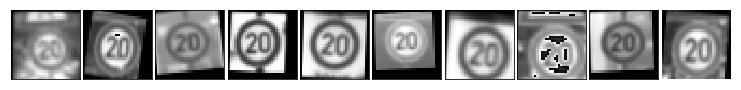

Class 1: Speed limit (30km/h)                               15120 samples


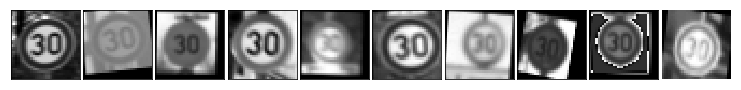

Class 2: Speed limit (50km/h)                               15120 samples


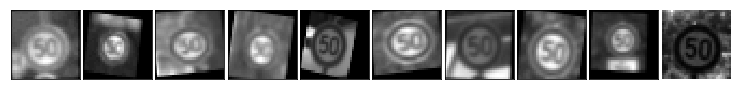

Class 3: Speed limit (60km/h)                               15120 samples


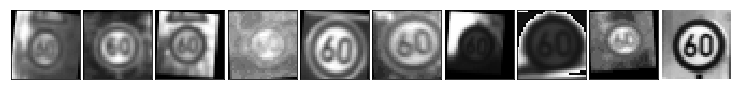

Class 4: Speed limit (70km/h)                               15120 samples


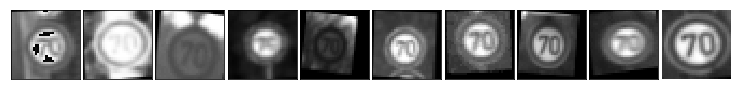

Class 5: Speed limit (80km/h)                               15120 samples


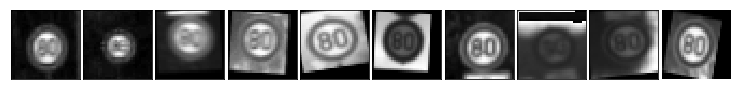

Class 6: End of speed limit (80km/h)                        15120 samples


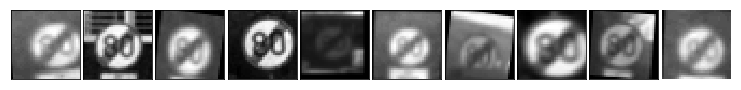

Class 7: Speed limit (100km/h)                              15120 samples


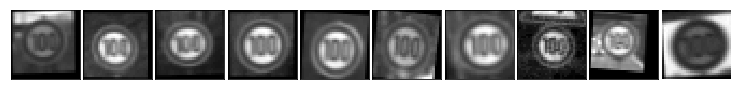

Class 8: Speed limit (120km/h)                              15120 samples


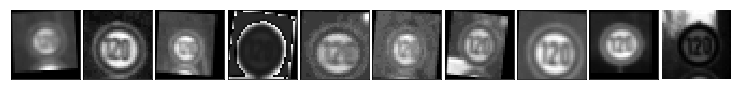

Class 9: No passing                                         15120 samples


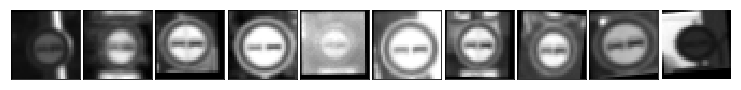

Class 10: No passing for vehicles over 3.5 metric tons       15120 samples


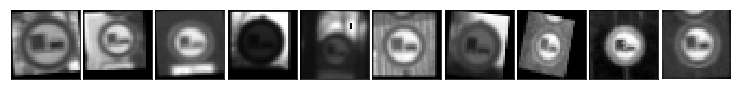

Class 11: Right-of-way at the next intersection              15120 samples


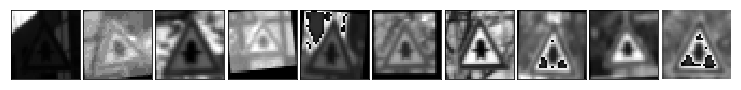

Class 12: Priority road                                      15120 samples


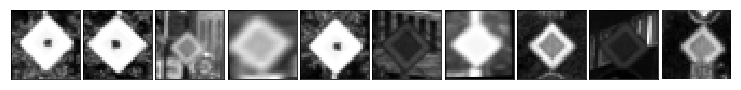

Class 13: Yield                                              15120 samples


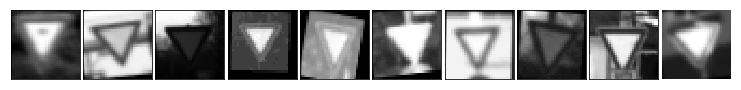

Class 14: Stop                                               15120 samples


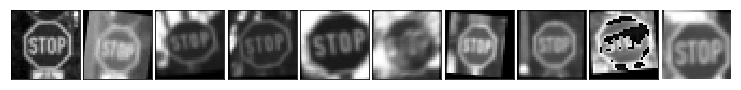

Class 15: No vehicles                                        15120 samples


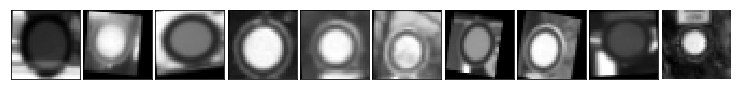

Class 16: Vehicles over 3.5 metric tons prohibited           15120 samples


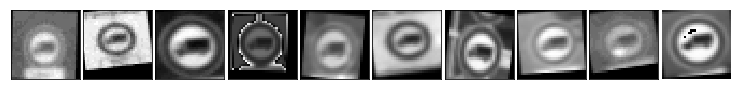

Class 17: No entry                                           15120 samples


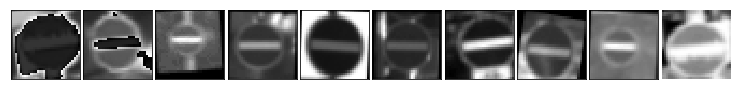

Class 18: General caution                                    15120 samples


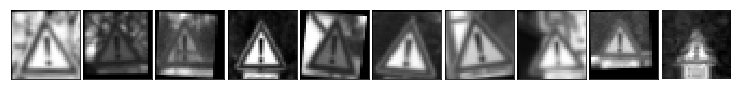

Class 19: Dangerous curve to the left                        15120 samples


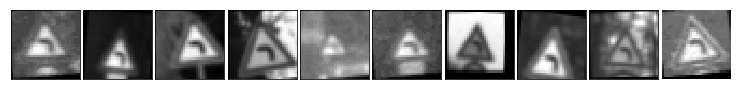

Class 20: Dangerous curve to the right                       15120 samples


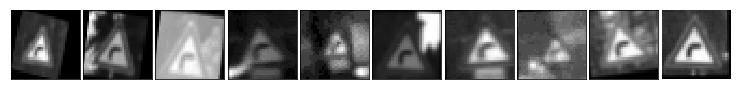

Class 21: Double curve                                       15120 samples


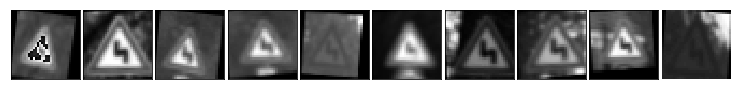

Class 22: Bumpy road                                         15120 samples


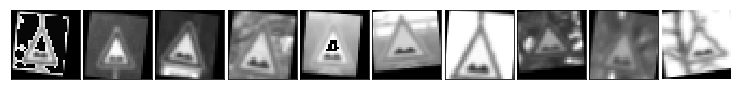

Class 23: Slippery road                                      15120 samples


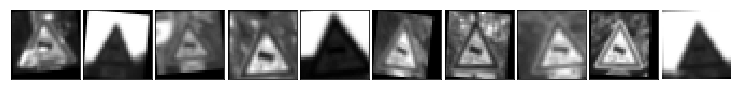

Class 24: Road narrows on the right                          15120 samples


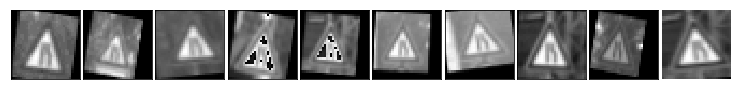

Class 25: Road work                                          15120 samples


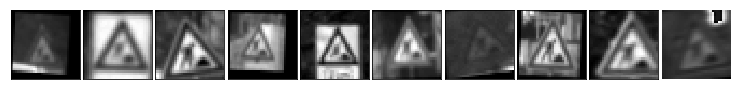

Class 26: Traffic signals                                    15120 samples


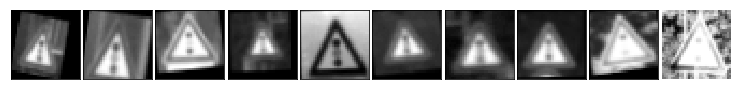

Class 27: Pedestrians                                        15120 samples


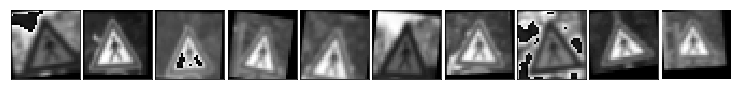

Class 28: Children crossing                                  15120 samples


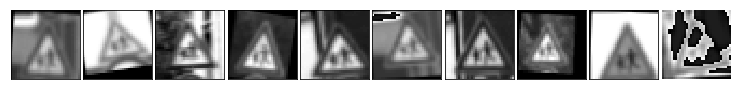

Class 29: Bicycles crossing                                  15120 samples


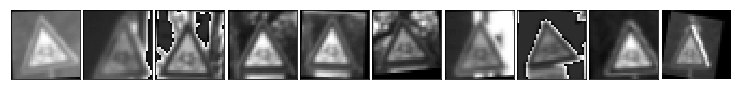

Class 30: Beware of ice/snow                                 15120 samples


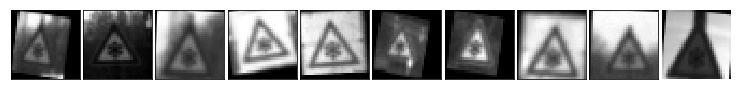

Class 31: Wild animals crossing                              15120 samples


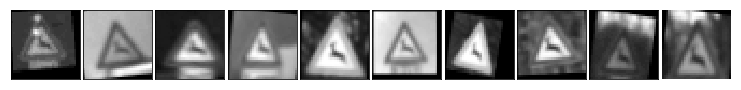

Class 32: End of all speed and passing limits                15120 samples


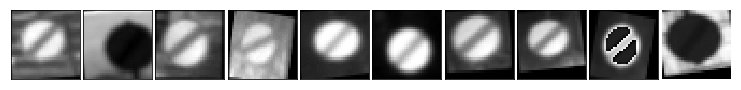

Class 33: Turn right ahead                                   15120 samples


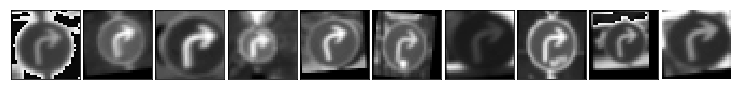

Class 34: Turn left ahead                                    15120 samples


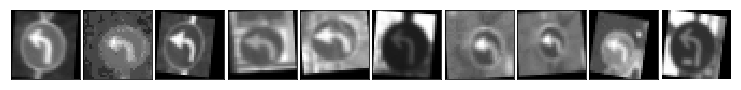

Class 35: Ahead only                                         15120 samples


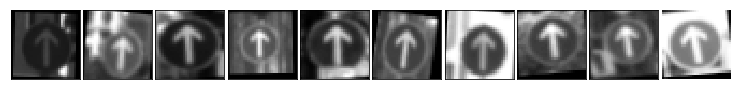

Class 36: Go straight or right                               15120 samples


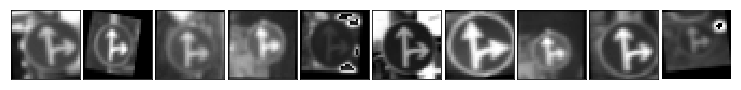

Class 37: Go straight or left                                15120 samples


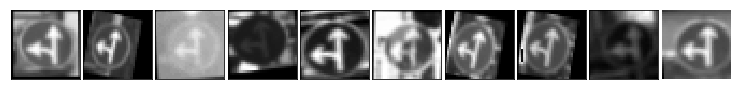

Class 38: Keep right                                         15120 samples


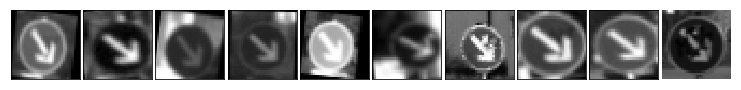

Class 39: Keep left                                          15120 samples


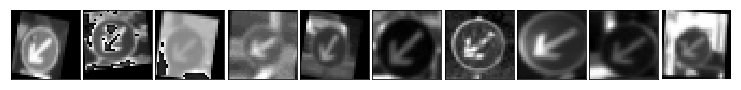

Class 40: Roundabout mandatory                               15120 samples


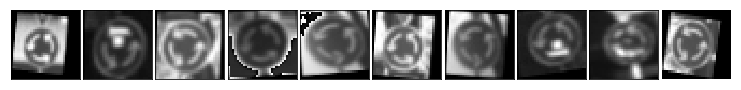

Class 41: End of no passing                                  15120 samples


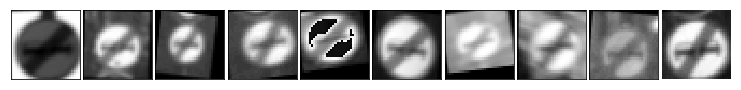

Class 42: End of no passing by vehicles over 3.5 metric tons 15120 samples


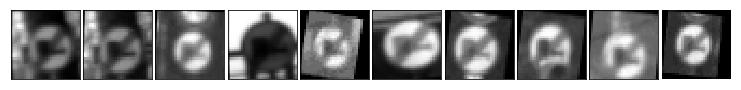

In [19]:
X_train = np.reshape(X_train, [X_train.shape[0], 32, 32, 1])
X_valid = np.reshape(X_valid, [X_valid.shape[0], 32, 32, 1])
X_test = np.reshape(X_test, [X_test.shape[0], 32, 32, 1])
examples_from_each(X_train, y_train, n_classes, signnames, cmap='gray')

In [21]:
np.save("train_data_normal", X_train)
np.save("valid_data_normal", X_valid)
np.save("test_data_normal", X_test)
np.save("train_labels", y_train)
np.save("valid_labels", y_valid)
np.save("test_labels", y_test)

### Model Architecture

In [18]:
X_train = np.load("train_data_normal.npy")
y_train = np.load("train_labels.npy")
X_valid = np.load("valid_data_normal.npy")
y_valid = np.load("valid_labels.npy")
X_test  = np.load("test_data_normal.npy")
y_test  = np.load("test_labels.npy")
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(650160, 32, 32, 1)
(650160,)
(4410, 32, 32, 1)
(4410,)
(12630, 32, 32, 1)
(12630,)


In [31]:
def convolution2D(
        x, 
        output_depth,
        kernel_size,
        strides=[1, 1], 
        padding='SAME',
        name="convlution",
        phase_train=tf.constant(False),
        use_batch_norm=False,
        weight_decay=0.0,
        stddev=1e-1
        ):
    with tf.variable_scope(name):
        input_depth = x.get_shape().as_list()[-1]
        regularizer = lambda t: l2_loss(t, weight=weight_decay)
        kernel = tf.get_variable(
            "weights",
            [kernel_size[0],
             kernel_size[1],
             input_depth,
             output_depth],
            initializer=tf.truncated_normal_initializer(stddev=stddev),
            regularizer=regularizer,
            dtype=x.dtype)
        conv = tf.nn.conv2d(x, kernel, [1, strides[0], strides[1], 1], padding=padding)
        if use_batch_norm:
            conv = batch_norm(conv, phase_train)
        else:
            biases = tf.get_variable(
                initializer=tf.constant(0.1, shape=[output_depth]), 
                name="biases", 
                dtype=x.dtype)
            conv = conv + biases
    return conv

def fully_connected(x, output_depth, name="fully_connected", weight_decay=0.0, stddev=1e-1):
    with tf.variable_scope(name):
        input_depth = x.get_shape().as_list()[-1]
        regularizer = lambda t: l2_loss(t, weight=weight_decay)
        weights = tf.get_variable(
            "weights",
            [input_depth, output_depth],
            initializer=tf.truncated_normal_initializer(stddev=stddev),
            regularizer=regularizer,
            dtype=x.dtype)
        biases = tf.get_variable(
            initializer=tf.constant(0.1, shape=[output_depth]), 
            name="biases", 
            dtype=x.dtype)
        activation = tf.matmul(x, weights) + biases
        out = tf.nn.relu(activation)
    return out

def logit_layer(x, classes, name="Logits", stddev=1e-1):
    with tf.variable_scope(name):
        input_depth = x.get_shape().as_list()[-1]
        weights = tf.get_variable(
            "weights",
            [input_depth, classes],
            initializer=tf.truncated_normal_initializer(stddev=stddev),
            dtype=x.dtype)
        biases = tf.get_variable(
            initializer=tf.constant(0.1, shape=[classes]), 
            name="biases", 
            dtype=x.dtype)
        activation = tf.matmul(x, weights) + biases
    return activation

def l2_loss(tensor, weight=1.0, name=None):
    with tf.name_scope(name):
        weight = tf.convert_to_tensor(weight, dtype=tensor.dtype.base_dtype, name='loss_weight')
        loss = tf.multiply(weight, tf.nn.l2_loss(tensor), name='value')
    return loss

def batch_norm(x, phase_train, decay=0.5, epsilon=1e-3):
    with tf.variable_scope("Batch_Norm"):
        #phase_train = tf.convert_to_tensor(phase_train, dtype=tf.bool)
        n_out = int(x.get_shape().as_list()[-1])
        beta = tf.Variable(
                    tf.constant(0.1, shape=[n_out], dtype=x.dtype), 
                    name="beta", 
                    trainable=True, 
                    dtype=x.dtype
                )
        gamma = tf.Variable(
                    tf.constant(0.1, shape=[n_out], dtype=x.dtype), 
                    name="gamma", 
                    trainable=True, 
                    dtype=x.dtype
                )
        batch_mean, batch_var = tf.nn.moments(x, [0, 1, 2], name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=decay)
        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)
        mean, var = control_flow_ops.cond(phase_train,
                                          mean_var_with_update,
                                          lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, epsilon)
    return normed

def max_pool(
        x, 
        kernel=[2, 2], 
        strides=[2, 2], 
        padding='SAME', 
        name="Max_Pool"):
    with tf.variable_scope(name):
        maxpool = tf.nn.max_pool(
                            x,
                            ksize=[1, kernel[0], kernel[1], 1],
                            strides=[1, strides[0], strides[1], 1],
                            padding=padding)
    return maxpool

In [32]:
def network(x, is_training, wdc, wdf, bn, scope=""):
    with tf.variable_scope(scope):
        mu = 0
        sigma = 0.1
        conv1 = convolution2D(
            x, 
            16, 
            [11, 11], 
            name="conv1", 
            padding="SAME", 
            phase_train=is_training, 
            use_batch_norm=bn, 
            weight_decay=wdc, 
            stddev=sigma
        )
        conv1 = tf.nn.relu(conv1)
        pool1 = max_pool(conv1)
        conv2 = convolution2D(
            pool1, 
            32, 
            [5, 5], 
            name="conv2", 
            padding="SAME", 
            phase_train=is_training, 
            use_batch_norm=bn, 
            weight_decay=wdc, 
            stddev=sigma
        )
        conv2 = tf.nn.relu(conv2)
        pool2 = max_pool(conv2)
        conv3 = convolution2D(
            pool2, 
            64, 
            [5, 5], 
            name="conv3", 
            padding="SAME", 
            phase_train=is_training, 
            use_batch_norm=bn, 
            weight_decay=wdc, 
            stddev=sigma
        )
        conv3 = tf.nn.relu(conv3)
        conv4 = convolution2D(
            conv3, 
            128, 
            [3, 3], 
            name="conv4", 
            padding="VALID", 
            phase_train=is_training, 
            use_batch_norm=bn, 
            weight_decay=wdc, 
            stddev=sigma
        )
        conv4 = tf.nn.relu(conv4)
        flat = flatten(conv4)
        fc1 = fully_connected(flat, 4096, name="fc1", weight_decay=wdf, stddev=sigma)
        fc2 = fully_connected(fc1, 4096, name="fc2", weight_decay=wdf, stddev=sigma)
        fc3 = fully_connected(fc2, 4096, name="fc3", weight_decay=wdf, stddev=sigma)
        logits = logit_layer(fc2, 43, name="logits", stddev=sigma)
        return logits

### Set up the inputs to the model

In [33]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
is_training = tf.placeholder(tf.bool)

### Training Pipeline

Using tf.nn.sparse_softmax_cross_entropy_with_logits allows for use to calulate cross entropy without first converting the labels to a one-hot encoding.

In [34]:
lr = 0.001

logits = network(x, is_training, 0.001, 0.001, True, scope="my-net")
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(cross_entropy)
reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
reg_loss = tf.add_n(reg_losses, name='total_loss')
loss = tf.add(loss, reg_loss)

global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(lr, global_step, 100000, 0.96, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss, global_step=global_step)

saver = tf.train.Saver()

[None, 32, 32, 16]


### Evaluation Pipeline

Evaluation using the argmax (gets the index of the largest value in the array) of the logit rather than of a softmax output. I will need to apply softmax to logits for when I want to have probabilities.

In [35]:
correct_prediction = tf.equal(tf.cast(tf.argmax(logits, 1), tf.int32), y)
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(sess, X_data, y_data, batch_size):
    num_examples = X_data.shape[0]
    total_accuracy = 0
    for offset in range(0, num_examples, batch_size):
        x_batch, y_batch = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_op, feed_dict={x: x_batch, y: y_batch, is_training: False})
        total_accuracy += (accuracy * x_batch.shape[0])
    return total_accuracy/num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the train set but low accuracy on the validation set implies overfitting.

Epoch  1/10: 100%|██████████| 2540/2540 [01:17<00:00, 32.63batches/s]


EPOCH: 1
TRAIN ACC: 0.949518580036
VALID ACC: 0.926530612083


Epoch  2/10: 100%|██████████| 2540/2540 [01:17<00:00, 32.62batches/s]


EPOCH: 2
TRAIN ACC: 0.963390550021
VALID ACC: 0.94693877551


Epoch  3/10: 100%|██████████| 2540/2540 [01:18<00:00, 32.50batches/s]


EPOCH: 3
TRAIN ACC: 0.960383597901
VALID ACC: 0.947619046916


Epoch  4/10: 100%|██████████| 2540/2540 [01:17<00:00, 32.69batches/s]


EPOCH: 4
TRAIN ACC: 0.975484496124
VALID ACC: 0.969614512472


Epoch  6/10:   0%|          | 0/2540 [00:00<?, ?batches/s]

EPOCH: 5
TRAIN ACC: 0.983639411855
VALID ACC: 0.959410430109


Epoch  7/10:   0%|          | 0/2540 [00:00<?, ?batches/s]

EPOCH: 6
TRAIN ACC: 0.980607850393
VALID ACC: 0.965532879575


Epoch  7/10: 100%|██████████| 2540/2540 [01:17<00:00, 32.58batches/s]


EPOCH: 7
TRAIN ACC: 0.983307185923
VALID ACC: 0.976870747813


Epoch  9/10:   0%|          | 0/2540 [00:00<?, ?batches/s]

EPOCH: 8
TRAIN ACC: 0.984483819385
VALID ACC: 0.972108843564


Epoch  9/10: 100%|██████████| 2540/2540 [01:17<00:00, 32.61batches/s]


EPOCH: 9
TRAIN ACC: 0.985163652024
VALID ACC: 0.980952381223


Epoch 10/10: 100%|██████████| 2540/2540 [01:17<00:00, 32.74batches/s]


EPOCH: 10
TRAIN ACC: 0.981543004799
VALID ACC: 0.977097506047


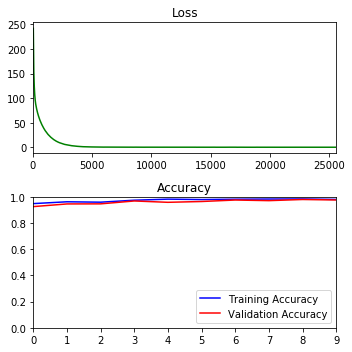

Training Accuracy   = 0.982
Validation Accuracy = 0.977



In [36]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

epochs = 10
BATCH_SIZE = 256
log_batch_step = 40

# Stuff for graphing
batches = []
loss_batch = []
epochs_list = []
train_accuracy_epoch = []
valid_accuracy_epoch = []
max_valid_acc = 0

from sklearn.utils import shuffle
import math
from tqdm import tqdm

saver = tf.train.Saver()


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    batch_count = int(math.ceil(X_train.shape[0]/BATCH_SIZE))
    
    for i in range(epochs):
        batch_progress = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(i+1, epochs), unit='batches')
        
        X_train, y_train = shuffle(X_train, y_train)
        for batch in batch_progress:
            offset = batch * BATCH_SIZE
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            _, l = sess.run([training_op, loss], feed_dict={x: batch_x, y: batch_y, is_training:True})
            
            if (batch % log_batch_step) == 0:    
                previous_log_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_log_batch)
                loss_batch.append(l)
            
        training_accuracy = evaluate(sess, X_train, y_train, BATCH_SIZE)
        validation_accuracy = evaluate(sess, X_valid, y_valid, BATCH_SIZE)
        epochs_list.append(i)
        train_accuracy_epoch.append(training_accuracy)
        valid_accuracy_epoch.append(validation_accuracy)
        print("EPOCH:", i+1)
        print("TRAIN ACC:", training_accuracy)
        print("VALID ACC:", validation_accuracy)
        if validation_accuracy > max_valid_acc:
            max_valid_acc = validation_accuracy
            filename = './models/network-{:.3f}'.format(validation_accuracy)
            saver.save(sess, filename)
        
    fig_size = [5, 5]
    plt.rcParams["figure.figsize"] = fig_size
    loss_plot = plt.subplot(211)
    loss_plot.set_title('Loss')
    loss_plot.plot(batches, loss_batch, 'g')
    loss_plot.set_xlim([batches[0], batches[-1]])
    acc_plot = plt.subplot(212)
    acc_plot.set_title("Accuracy")
    acc_plot.plot(epochs_list, train_accuracy_epoch, 'b', label='Training Accuracy')
    acc_plot.plot(epochs_list, valid_accuracy_epoch, 'r', label='Validation Accuracy')
    acc_plot.set_ylim([0, 1.0])
    acc_plot.set_xlim([epochs_list[0], epochs_list[-1]])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()
    
    print("Training Accuracy   = {:.3f}".format(training_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print()

## Test Set Evaluation

In [38]:
filename = "./models/network-0.981"
with tf.Session() as sess:
    saver.restore(sess, filename)
    test_accuracy = evaluate(sess, X_test, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

Test Accuracy = 0.957



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(5, 32, 32, 1)


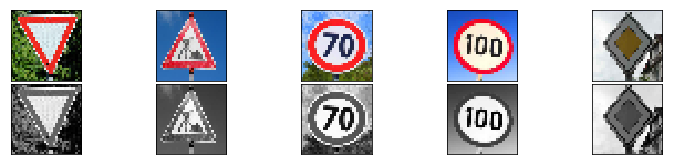

In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
glob_pattern = "examples/new_sign*.png"
new_image_names = glob.glob(glob_pattern)
new_images = []
for image in new_image_names:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    new_images.append(img)
    

fig = plt.figure(figsize = (10, 2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(new_images)):
    axis = fig.add_subplot(2, 5, i + 1, xticks=([]), yticks=([]))
    plt.imshow(new_images[i])

processed_images = []
for i in new_images:
    i = gray_scale(i)
    i = mean_subtraction(i, mean)
    i = normalize(i, stddev)
    processed_images.append(i)
    
for i in range(len(processed_images)):
    axis = fig.add_subplot(2, 5, i + 1 + 5, xticks=([]), yticks=([]))
    plt.imshow(processed_images[i], cmap='gray')

test_images = np.array(processed_images)
test_images = np.expand_dims(test_images, axis=3)
print(test_images.shape)

### Predict the Sign Type for Each Image

In [42]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, filename)
    test_labels = ["Yield", "Road work", "Speed limit (70km/h)", "Speed limit (100km/h)", "Priority road"]
    test_labels = [signnames.index(i) for i in test_labels]
    for image in test_images:
        prediction = sess.run(logits, feed_dict={x: np.expand_dims(image, axis=0), is_training: False})
        print(signnames[np.argmax(prediction)])

Yield
Road work
Speed limit (70km/h)
Stop
Priority road


### Analyze Performance

In [43]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, filename)
    print(evaluate(sess, test_images, test_labels, 5))

0.800000011921


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [44]:
def display_probs(images, labels, probs, signnames):
    figure = plt.figure(figsize=(6, 12))
    for i in range(len(images)):
        axs = figure.add_subplot(images.shape[0], 2, i * 2 + 2, xticks=([]), yticks=([]))
        image = images[i, :, :, :]
        image = np.squeeze(image, axis=2)
        axs.imshow(image, cmap='gray')
        axs.set_title(labels[i])
        y_labels = [signnames[j] for j in probs.indices[i]]
        axs2 = figure.add_subplot(images.shape[0], 2, i * 2 + 1, xticks=([]))
        ind = np.arange(len(images))
        width = 0.5
        bar_list = axs2.barh(ind, probs.values[i], width, color='blue')
        axs2.set_yticks(ind+width/2)
        axs2.set_yticklabels(y_labels, minor=False)
        bar_list[np.argmax(probs.values[i])].set_color('r')

TopKV2(values=array([[  9.98309493e-01,   8.59026215e-04,   3.28255846e-04,
          8.45475151e-05,   8.35298415e-05],
       [  9.57483232e-01,   2.57861000e-02,   8.77022278e-03,
          2.62904144e-03,   1.11844705e-03],
       [  9.87592399e-01,   1.23961754e-02,   6.58646331e-06,
          2.54118072e-06,   1.00973841e-06],
       [  8.80983710e-01,   8.89430270e-02,   2.09036544e-02,
          2.62305490e-03,   2.60301307e-03],
       [  1.00000000e+00,   6.92979832e-12,   4.06447358e-12,
          1.77693797e-12,   1.20188928e-12]], dtype=float32), indices=array([[13, 38,  2, 39, 15],
       [25, 21, 24, 30, 27],
       [ 4,  0,  1, 14, 40],
       [14, 15,  4,  2, 38],
       [12, 40, 32, 38, 39]], dtype=int32))
Softmax Probabilities
[  9.98309493e-01   8.59026215e-04   3.28255846e-04   8.45475151e-05
   8.35298415e-05] 
 ['Yield', 'Keep right', 'Speed limit (50km/h)', 'Keep left', 'No vehicles']

[ 0.95748323  0.0257861   0.00877022  0.00262904  0.00111845] 
 ['Road work',

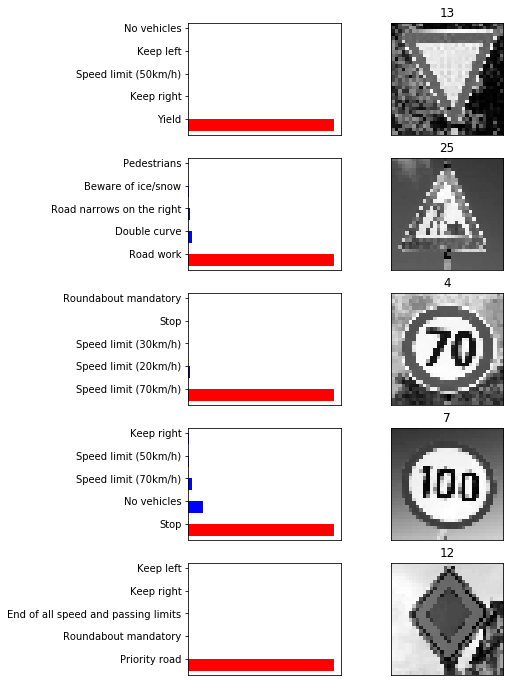

In [46]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
top5 = tf.nn.top_k(softmax, 5)
with tf.Session() as sess:
    saver.restore(sess, filename)
    probs = sess.run(top5, feed_dict={x:test_images, is_training: False})
    
print(probs)
print("Softmax Probabilities")
for i in range(len(test_images)):
    print(probs.values[i], "\n", [signnames[j] for j in probs.indices[i]])
    print()
display_probs(test_images, test_labels, probs, signnames)

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 